In [11]:
import ROOT as R
R.gStyle.SetOptFit(0)



def GetParameterList(version,method,syst):
    f = R.TFile('~/WorkRun23/output/Run2C_%smethod_%s_%s.root'%(method,syst,version))
    val = []
    for n in range(20):
        func = f.Get('func_28paras_run23_sjtu_Run2C_%smethod_%s_%s'%(method,syst,n))
        R_ = func.GetParameter(3)
        eR_ = func.GetParError(3)
        chi2 = func.GetChisquare()
        ndf = func.GetNDF()
        val.append([R_,eR_,chi2/ndf])
    return val


def GetGraphs(pars,range_x):
    graph_R = R.TGraphErrors()
    graph_chi2 = R.TGraph()
    range_n = map(lambda x:int(x/0.1),range_x)
    for n in range(*range_n):
        x = n*0.1
        np = graph_R.GetN()
        graph_R.SetPoint(np,x,pars[n][0])
        graph_R.SetPointError(np,0,pars[n][1])
        graph_chi2.SetPoint(np,x,pars[n][2])
    return graph_R,graph_chi2

def DrawChi2Cmp(method,syst,range_x,legPos):
    nameMap = {
    'gain_A':'In-fill gain amp.',
    'gain_T':'In-fill gain #tau',
    'stdp_A':'STDP amp.',
    'stdp_T':'STDP #tau',
    }    
    versions = ['Scan_FixedPU_adhoc0','Scan_FixedPU_adhoc1']
    colors = [R.kRed,R.kBlue]
    names = ['W/o ad-hoc','W/ ad-hoc']

    multi_g_chi2 = R.TMultiGraph()
    graphs_chi2 = []

    range_n = map(lambda x:int(x/0.1),range_x)
    for n in range(2):
        version = versions[n]
        
        pars = GetParameterList(version,method,syst)
        graph_R, graph_chi2 = GetGraphs(pars,range_x)

        graph_chi2.SetLineColor(colors[n])
        graph_chi2.SetTitle(names[n])
        graph_chi2.SetLineWidth(1)
        graph_chi2.SetMarkerStyle(8)
        graph_chi2.SetMarkerColor(colors[n])
        
        graph_chi2.SetMarkerSize(0.8)
        multi_g_chi2.Add(graph_chi2)
        graphs_chi2.append(graph_chi2)
        
        
    c = R.TCanvas()
    multi_g_chi2.Draw('ALP')
    multi_g_chi2.SetTitle('%s scan (%s-method);Multiplier;#chi^{2}/NDF'%(nameMap[syst],method))
    c.BuildLegend(*legPos)
    c.Draw()
    return c,multi_g_chi2,graph_chi2,graphs_chi2 

def DrawSensitivityCmp(method,syst,range_x,legPos,rangey=[-80,-60]):
    nameMap = {
    'gain_A':'In-fill gain amp.',
    'gain_T':'In-fill gain #tau',
    'stdp_A':'STDP amp.',
    'stdp_T':'STDP #tau',
    }

    versions = ['Scan','Scan_FixedPU_adhoc0','Scan_FixedPU_adhoc1']
    colors = [R.kBlack,R.kRed,R.kBlue]
    names = ['Raw','Randomized','Randomized+Ad-hoc']

    funcs = []
    graphs_R = []
    range_n = map(lambda x:int(x/0.1),range_x)
    c = R.TCanvas()
    
    multi_g_R = R.TMultiGraph()
    for n in range(1,3):
        version = versions[n]
        
        pars = GetParameterList(version,method,syst)
        graph_R, graph_chi2 = GetGraphs(pars,range_x)
        fit_func = R.TF1('fit_func%s'%(n),'[0]+[1]*x',range_x[0],range_x[1]-0.1)
        fit_func.SetParNames('Y-intercept','Sensitivity')
        fit_func.SetLineColor(colors[n])
        fit_func.SetNpx(5000)
        graph_R.Fit(fit_func)
        funcs.append(fit_func)
        fit_func.Draw('same')

        graph_R.SetLineColor(colors[n])
        graph_R.SetTitle(names[n])
        graph_R.SetLineWidth(1)
        graph_R.SetMarkerStyle(8)
        graph_R.SetMarkerColor(colors[n])
        
        graph_R.SetMarkerSize(0.8)
        multi_g_R.Add(graph_R)
        graphs_R.append(graph_R)

    multi_g_R.Draw('ALP')    
    multi_g_R.SetTitle('%s scan (%s-method);Multiplier;R [ppm]'%(nameMap[syst],method))
    multi_g_R.GetYaxis().SetRangeUser(*rangey)
    c.Draw()
    c.BuildLegend(*legPos)
    return c,funcs,graphs_R,multi_g_R

 FCN=0.000141095 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.6336e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.95811e+01   6.40356e-01   9.36026e-05  -2.94640e-09
   2  Sensitivity   9.33671e-02   6.47541e-01   9.46527e-05  -2.91602e-09
 FCN=7.1648e-05 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=3.52579e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.95307e+01   6.75777e-01   9.45445e-05   1.36215e-09
   2  Sensitivity   9.74849e-02   6.77399e-01   9.47713e-05   1.34759e-09


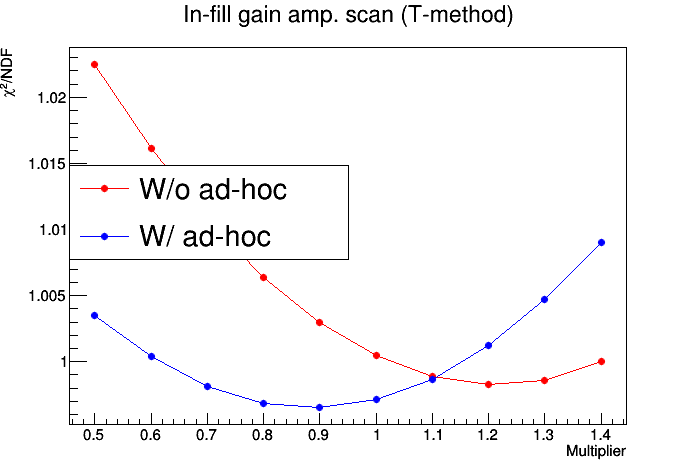

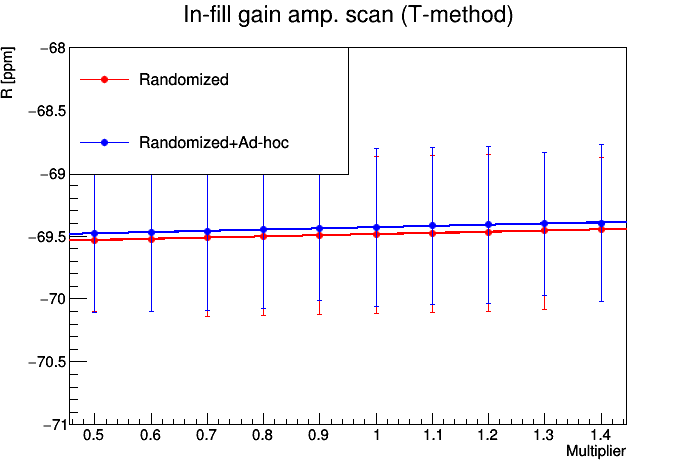

In [12]:
# compare chi2 cross versions
method = 'T'
syst = 'gain_A'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=7.07562e-05 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=5.39232e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94901e+01   2.60005e-01   8.09951e-05  -7.85098e-10
   2  Sensitivity   1.73904e-03   2.31502e-01   7.21160e-05  -8.63087e-10
 FCN=2.22509e-05 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=7.82525e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94339e+01   2.62533e-01   8.45355e-05   8.84066e-10
   2  Sensitivity   1.48017e-03   2.38169e-01   7.66905e-05   9.64651e-10


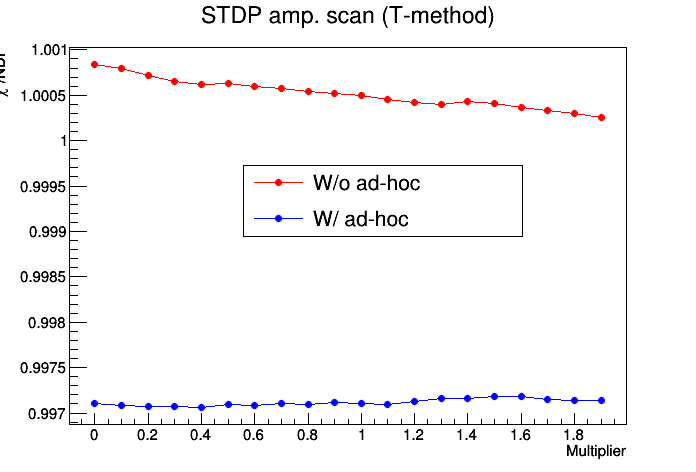

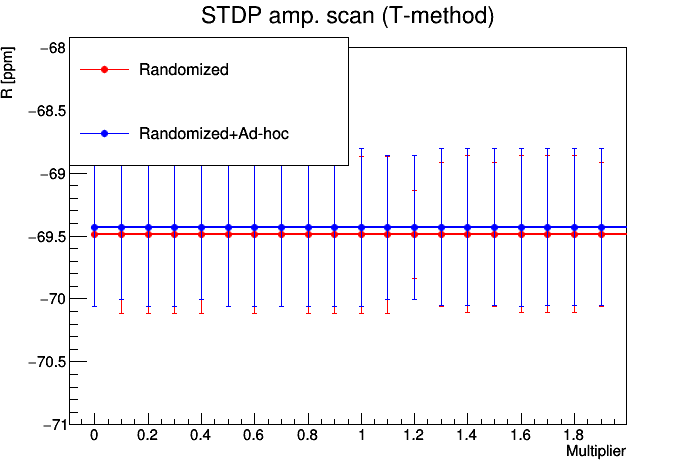

In [13]:
method = 'T'
syst = 'stdp_A'
range_x = [0.,2.]
legPos = [0.35,0.5,0.75,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.65,0.5,0.92]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=0.00502067 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.23132e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.97215e+01   6.63087e-01   9.38351e-05   8.12154e-10
   2  Sensitivity   2.49848e-01   6.75431e-01   9.55819e-05   7.92457e-10
 FCN=0.00709135 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=7.03519e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.96811e+01   5.97889e-01   8.56246e-05   2.13567e-09
   2  Sensitivity   2.66288e-01   5.55826e-01   7.96007e-05   2.26512e-09


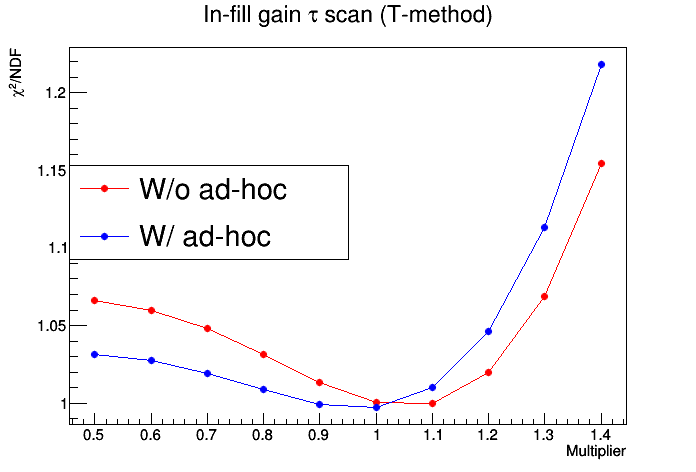

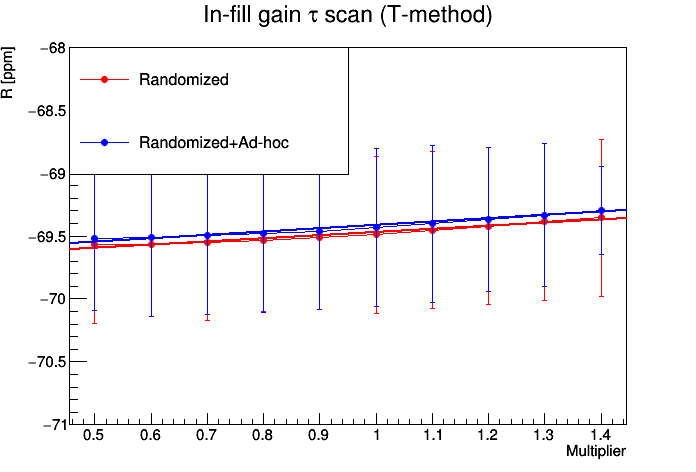

In [14]:
# compare chi2 cross versions
method = 'T'
syst = 'gain_T'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=9.24916e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.92152e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94908e+01   5.81861e-01   7.78289e-05  -3.83810e-10
   2  Sensitivity   2.15773e-03   5.98373e-01   8.00376e-05  -3.75693e-10
 FCN=3.41388e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=4.91407e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.94340e+01   6.75471e-01   8.61444e-05   5.57909e-10
   2  Sensitivity   1.09295e-03   6.69569e-01   8.53916e-05   5.60964e-10


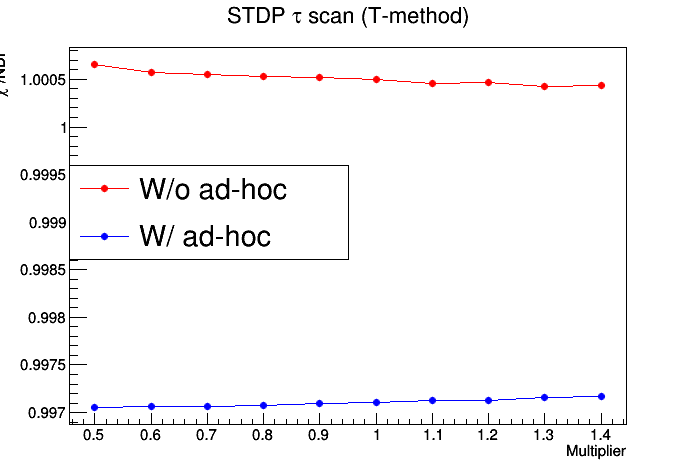

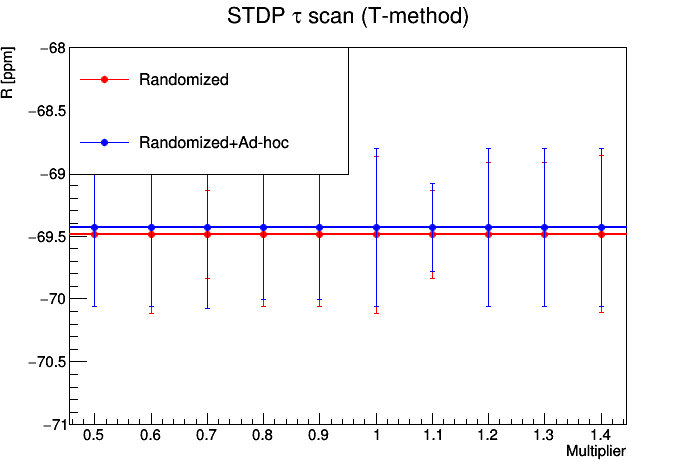

In [15]:
# compare chi2 cross versions
method = 'T'
syst = 'stdp_T'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=1.03414e-05 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=7.42344e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.98091e+01   6.03279e-01   8.48336e-05   2.19579e-09
   2  Sensitivity   9.69989e-02   6.00946e-01   8.45055e-05   2.20103e-09
 FCN=6.25079e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=7.22713e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.97860e+01   5.89515e-01   8.18248e-05  -2.24067e-10
   2  Sensitivity   9.92704e-02   5.88834e-01   8.17303e-05  -2.25196e-10


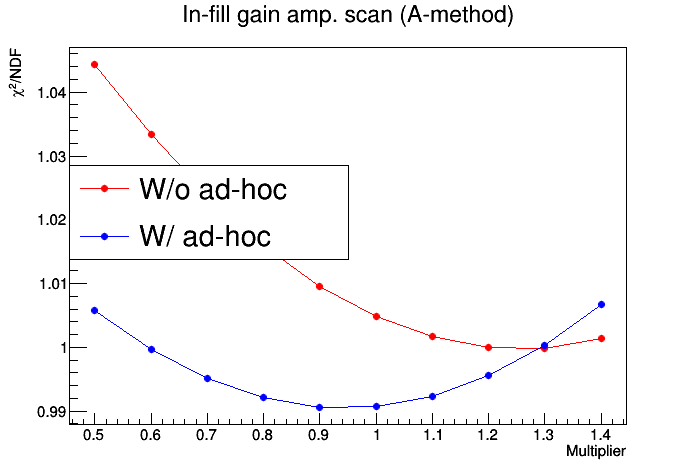

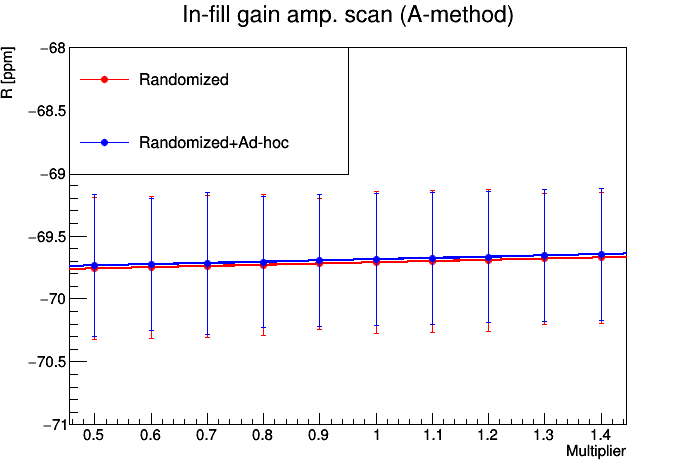

In [16]:
# compare chi2 cross versions
method = 'A'
syst = 'gain_A'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=0.00486039 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=3.53255e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.99456e+01   5.99468e-01   8.63605e-05   4.41663e-10
   2  Sensitivity   2.46591e-01   6.07612e-01   8.75338e-05   4.68294e-10
 FCN=0.00486806 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=2.35752e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.99278e+01   5.83559e-01   8.26100e-05   3.91226e-10
   2  Sensitivity   2.52265e-01   5.87618e-01   8.31845e-05   4.03992e-10


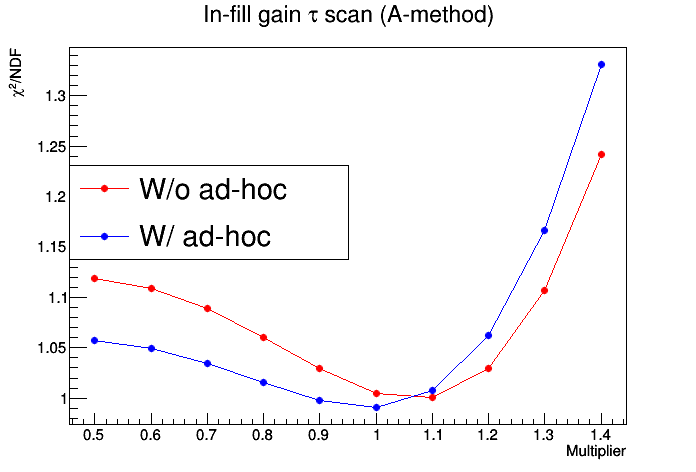

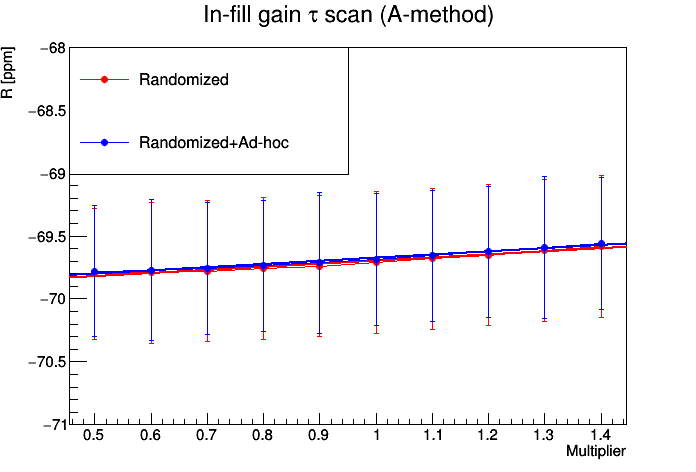

In [17]:
# compare chi2 cross versions
method = 'A'
syst = 'gain_T'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=6.34191e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.61083e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.97146e+01   5.94710e-01   8.48343e-05   1.02251e-09
   2  Sensitivity   2.74395e-03   5.97269e-01   8.51995e-05   1.01662e-09
 FCN=3.07851e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=3.69556e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.96885e+01   5.92719e-01   8.24086e-05   1.59465e-09
   2  Sensitivity   2.84981e-03   5.94949e-01   8.27187e-05   1.58754e-09


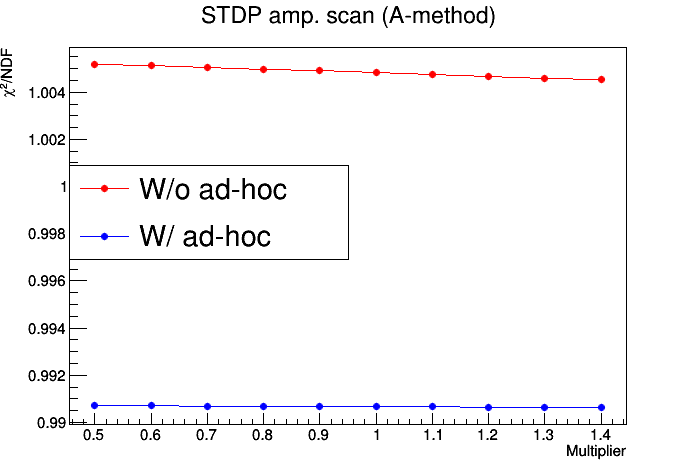

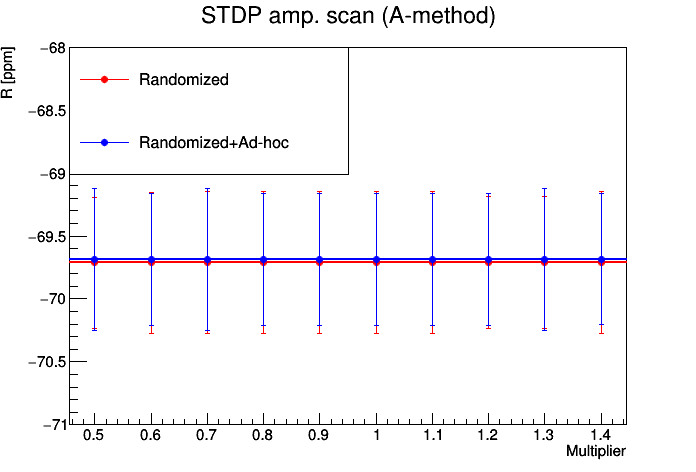

In [18]:
# compare chi2 cross versions
method = 'A'
syst = 'stdp_A'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)

 FCN=6.24055e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=6.77578e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.97161e+01   6.10992e-01   7.82059e-05   2.27947e-09
   2  Sensitivity   4.31265e-03   6.01898e-01   7.70419e-05   2.31134e-09
 FCN=1.60751e-06 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=5.99348e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Y-intercept  -6.96906e+01   5.77031e-01   8.12538e-05   6.50697e-10
   2  Sensitivity   4.60624e-03   5.85453e-01   8.24397e-05   6.41747e-10


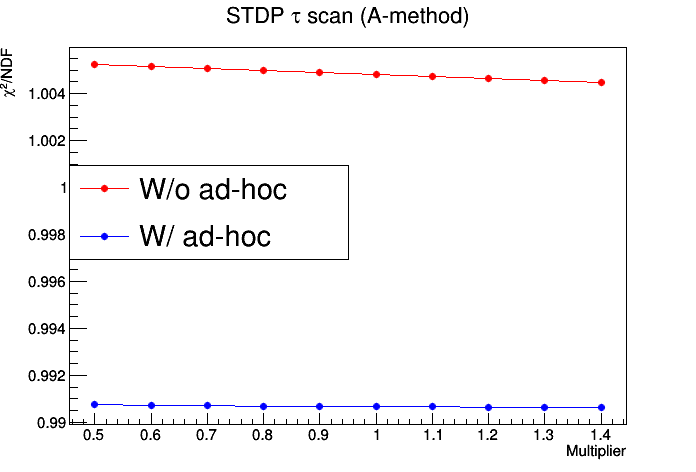

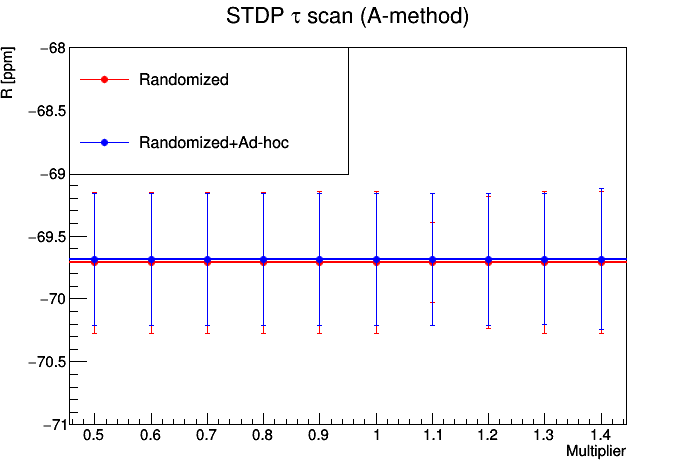

In [19]:
# compare chi2 cross versions
method = 'A'
syst = 'stdp_T'
range_x = [0.5,1.5]
legPos = [0.1,0.45,0.5,0.65]
c1 = DrawChi2Cmp(method,syst,range_x,legPos)

legPos = [0.1,0.63,0.5,0.9]
rangey = [-71,-68]
c2 = DrawSensitivityCmp(method,syst,range_x,legPos,rangey)